In [1]:
pip install salib

  Stored in directory: C:\Users\LENOVO\AppData\Local\pip\Cache\wheels\04\5c\9f\09d58ab84d5a7ef7d2e5fedc5cd2f46a64a77c99035571aa0c
Successfully built salib
Note: you may need to restart the kernel to use updated packages.


(8000, 3) (8000,)
Parameter S1 S1_conf ST ST_conf
x1 0.241379 0.035512 0.233006 0.022426
x2 -0.001635 0.075843 0.757444 0.072423
x3 -0.019499 0.078779 0.746122 0.079562

Parameter_1 Parameter_2 S2 S2_conf
x1 x2 -0.002905 0.049603
x1 x3 -0.007212 0.058641
x2 x3 0.768228 0.124827

S1: [ 0.24137922 -0.00163541 -0.01949871]
x1-x2: -0.0029050009015768557
x1-x3: -0.007212159874777583
x2-x3: 0.7682277244642012


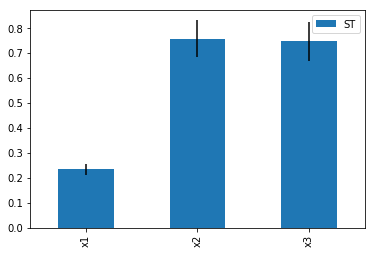

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import math
%matplotlib inline
# Define the model inputs
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}
 
 
def evaluate(X):  # 这里是我们要进行灵敏度分析的模型,接受一个数组,每个数组元素作为模型的一个输入,模型的输出是一个float,干函数返回的时候再讲所有输出并起来
    return np.array([math.sin(x[0]) + x[1] * math.cos(2 * x[2]) for x in X])
 
 
# Generate samples
param_values = saltelli.sample(problem, 1000)
 
# Run model (example)
Y = evaluate(param_values)
print(param_values.shape, Y.shape)
# Perform analysis (这里运行完成后会自动对结果进行展示)
Si = sobol.analyze(problem, Y, print_to_console=True)
print()
 
# Print the first-order sensitivity indices  一阶灵敏度
print('S1:', Si['S1'])
 
# Print the second-order sensitivity indices   二阶灵敏度
print("x1-x2:", Si['S2'][0, 1])
print("x1-x3:", Si['S2'][0, 2])
print("x2-x3:", Si['S2'][1, 2])

from SALib.plotting.bar import plot as barplot
import matplotlib.pyplot as plot
 
Si_df = Si.to_df()
barplot(Si_df[0])
plot.show()